In [1]:
import numpy as np
import time
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

from Resources.Model import Model_v25
from Resources.Game import *
from Resources.TS_ModelGuided import *
from Resources.TS_ModelGuided_MCRollout import *
from Resources.TS_ModelGuided_SensAnalysis import *

from test_games import test_games


##### Setup Model

In [2]:
model = Model_v25()
model.eval()
model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v25/model_2000_batches'))

<All keys matched successfully>

In [7]:
n_games = 1
tmax = 1

# [wins, value sum, value ind, grad sum, grad ind, exploration]
factors = [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1e-3]
factors = np.array(factors)

test_factors = [-0.5, -0.15, -0.05, 0, 0.05, 0.15, 0.5]
test_results = [[0, 0, 0] for _ in test_factors]

number_games = 0

In [12]:
while True:

    for t, test_factor in enumerate(test_factors):
        if t in [0, 1, 5, 6]:
            continue

        factors_test = factors.copy()
        factors_test[5] = test_factor

        wins_1, draws, wins_2 = test_games(n_games, model, tmax, 
                                        factors, factors_test, sensitivity_extraction=sensitivity_extraction_2)
        
        number_games += 1

        if wins_1 == 1:
            test_results[t][0] += 1

        if draws == 1:
            test_results[t][1] += 1

        if wins_2 == 1:
            test_results[t][2] += 1

    print(number_games)

227
230
233
236
239
242
245
248
251
254
257
260
263
266
269
272


KeyboardInterrupt: 

In [9]:
for i in test_results:
    print(sum(i), i)

32 [28, 2, 2]
32 [21, 5, 6]
32 [14, 9, 9]
32 [17, 5, 10]
32 [15, 7, 10]
31 [21, 7, 3]
31 [22, 6, 3]


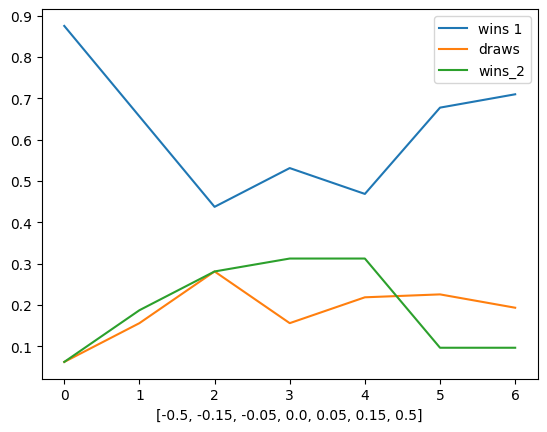

In [10]:
plt.plot([i[0]/sum(i) for i in test_results], label='wins 1')
plt.plot([i[1]/sum(i) for i in test_results], label='draws')
plt.plot([i[2]/sum(i) for i in test_results], label='wins_2')
plt.xlabel([-0.5, -0.15, -0.05, 0.0, 0.05, 0.15, 0.5])
plt.legend()
plt.show()